**NIfTI (Neuroimaging Informatics Technology Initiative ) format**<br>
-Standardized representation of images<br>
-Most commonly used type of analytic file<br>
-Developed to facilitate cross-platform, cross-software interpretability<br>
-3-dimensional(3D) array: stacking individual slices on top of each other<br>
**DICOM is like onesheet of paper and NIfTI  is like stack of papers**

**----> DICOM header contains many fields, protected health information, hospital related meta-data**

**----> NIfTI header contains image meta-data, no patient information**

# Converting DICOM to NIfTI format image

**---->DICOM series can be converted to NIfTI using 'dicom2nifti' in python**

In [2]:
import numpy as np
import dicom2nifti
import nibabel as nib #Read and write access to some common neuroimaging file format
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
dicom2nifti.convert_directory('./Neurohacking_data-0.0/BRAINIX/DICOM/FLAIR/','./DICOM2NIfTI/',compression=False)

In [4]:
nifti_img_path= './DICOM2NIfTI/401_st2wflair.nii.gz'


In [5]:
image_obj = nib.load(nifti_img_path)
type(image_obj)

nibabel.nifti1.Nifti1Image

In [6]:
#extracting data as numpy array
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [7]:
image_data.shape

(288, 288, 22)

plotting layer Layer 0, Channel 0 of Image


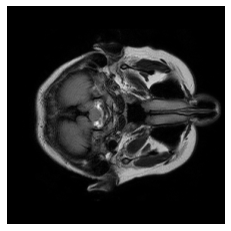

In [8]:
#Select random layer number
maxval = 22
i = np.random.randint(0,maxval)
#define
channel = 0
print(f'plotting layer Layer {i}, Channel {channel} of Image')
plt.imshow(image_data[:, :, i], cmap='gray')
plt.axis('off')
plt.show()


In [9]:
def explore_3D_img(layer):
    plt.figure(figsize=(10,15))
    plt.imshow(image_data[:, :, layer], cmap='gray')
    plt.title('Layers of Brain MRI',fontsize=20)
    plt.axis('off')
    return  plt.show()


In [10]:
#using ipywidget interact function to explore
interact(explore_3D_img,layer=(1,image_data.shape[2]-1))


interactive(children=(IntSlider(value=11, description='layer', max=21, min=1), Output()), _dom_classes=('widge…

<function __main__.explore_3D_img(layer)>